<a href="https://colab.research.google.com/github/AgentV0/Machine-Learning-/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задачи
Этот набор данных предназначен для изучения поведения пользователей и работы онлайн-рекламы, с основным фокусом на предсказание вероятности клика пользователя по рекламе. Он включает демографические данные пользователей, их поведенческие привычки, а также детали, связанные с отображением рекламы. Этот набор данных идеально подходит для построения моделей бинарной классификации, позволяющих предсказывать взаимодействие пользователей с онлайн-рекламой.

**Параметры**

* id: Уникальный идентификатор пользователя.
* full_name: Имя пользователя в формате "UserX" для обеспечения анонимности.
* age: Возраст пользователя (от 18 до 64 лет).
* gender: Пол пользователя (категории: Мужчина, Женщина, другое).
* device_type: Тип устройства, с которого пользователь просматривает рекламу (Мобильное, Десктоп, Планшет).
* ad_position: Позиция рекламы на веб-странице (Верх, Бок, Низ).
* browsing_history: Предыдущая активность пользователя в интернете перед просмотром рекламы (категории: Покупки, Новости, Развлечения, Образование, Социальные сети).
* time_of_day: Время суток, когда пользователь увидел рекламу (Утро, День, Вечер, Ночь).
* click: Целевая метка, указывающая на факт клика по рекламе (1 — клик, 0 — отсутствие клика).

**Цель**

Задача этого набора данных — предсказать, кликнет ли пользователь по онлайн-рекламе, исходя из его демографических характеристик, поведения в интернете, условий показа рекламы и времени суток. Для этого необходимо будет провести очистку и анализ данных, после чего применить модели машинного обучения для предсказания и оценки результата. Это достаточно сложная задача для подобных данных.

Этот набор данных можно использовать для улучшения стратегий таргетинга рекламы, оптимизации размещения рекламных блоков и более глубокого понимания взаимодействия пользователей с онлайн-рекламой.

# Подключаем библиотеки и считываем данные:

In [ ]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


df = pd.read_csv('ad_click_dataset.csv')

# Визуализация данных и вывод основных характеристик:

Избавляемся от ненужных данных

In [ ]:
df.drop('id', axis= 1 , inplace= True )
df.drop('full_name', axis= 1 , inplace= True )

Основные характеристики:

In [ ]:
df.describe()

,age,click
count,5234.000000,10000.000000
mean,40.197363,0.650000
std,13.126420,0.476993
min,18.000000,0.000000
25%,29.000000,0.000000
50%,39.500000,1.000000
75%,52.000000,1.000000
max,64.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               5234 non-null   float64
 1   gender            5307 non-null   object 
 2   device_type       8000 non-null   object 
 3   ad_position       8000 non-null   object 
 4   browsing_history  5218 non-null   object 
 5   time_of_day       8000 non-null   object 
 6   click             10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [ ]:
# Функция для построения графиков с адаптивной шкалой Y
def plot_click_percentage(data, x, title, xlabel):
    click_data = data.groupby(x, observed=False)['click'].mean() * 100
    max_percent = click_data.max()  # Находим максимум для адаптации шкалы
    plt.figure(figsize=(8, 5))
    sns.barplot(x=click_data.index, y=click_data.values, palette='viridis', hue=click_data.index, legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Процент кликнувших (%)")
    plt.ylim(0, max_percent * 1.1)  # Шкала чуть выше максимального значения
    plt.show()

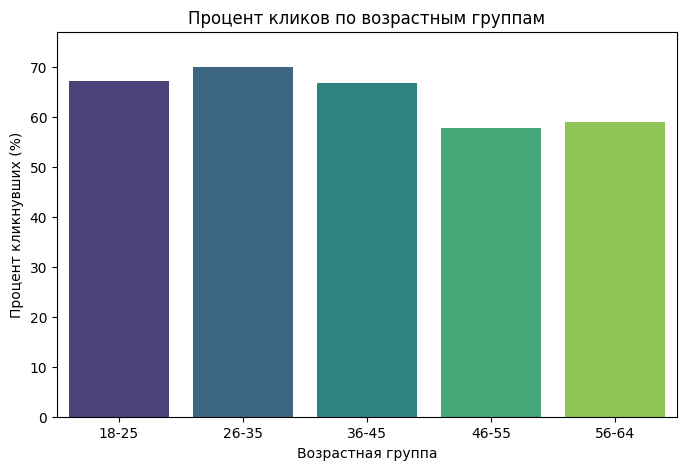

In [ ]:
# 1 Процент кликнувших по возрастным группам
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-64"]

age_group = pd.cut(df['age'], bins=age_bins, labels=age_labels)

plot_click_percentage(df.assign(age_group=age_group), 'age_group', "Процент кликов по возрастным группам", "Возрастная группа")

Как видим по графику, люди старше 45 реже всего кликают на рекламу, а в возростной группе 26-35 процент кликов наибольший.

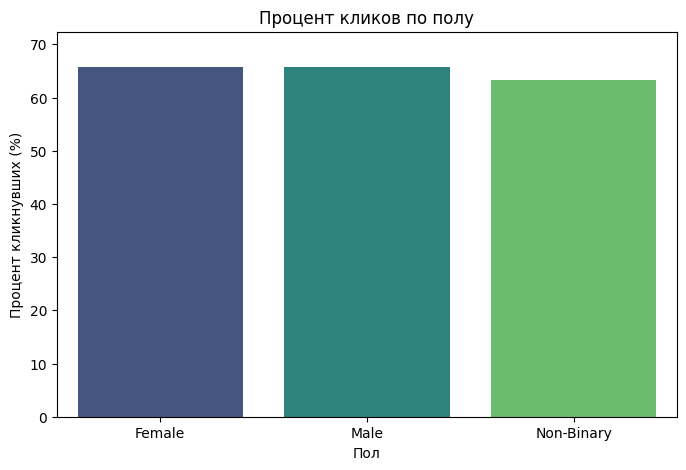

In [ ]:
# 2. Процент кликнувших по полу
plot_click_percentage(df, 'gender', "Процент кликов по полу", "Пол")



Как видим, процент кликов почти не зависит от пола.

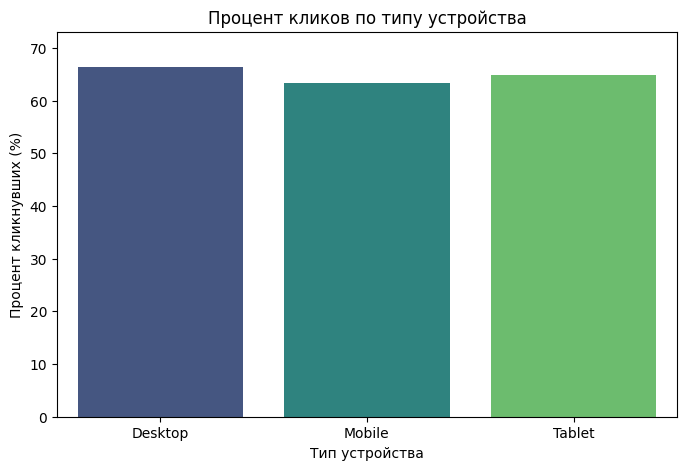

In [ ]:
# 3. Процент кликнувших по типу устройства
plot_click_percentage(df, 'device_type', "Процент кликов по типу устройства", "Тип устройства")

По графику видно, что процент кликов не сильно зависит от типа устройства.

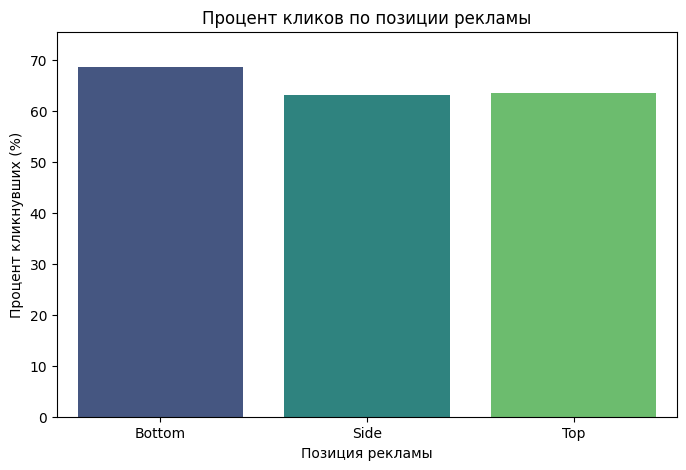

In [ ]:
# 4. Процент кликнувших по позиции рекламы
plot_click_percentage(df, 'ad_position', "Процент кликов по позиции рекламы", "Позиция рекламы")



Похоже, что самое выгодное расположение рекламы - низ экрана.

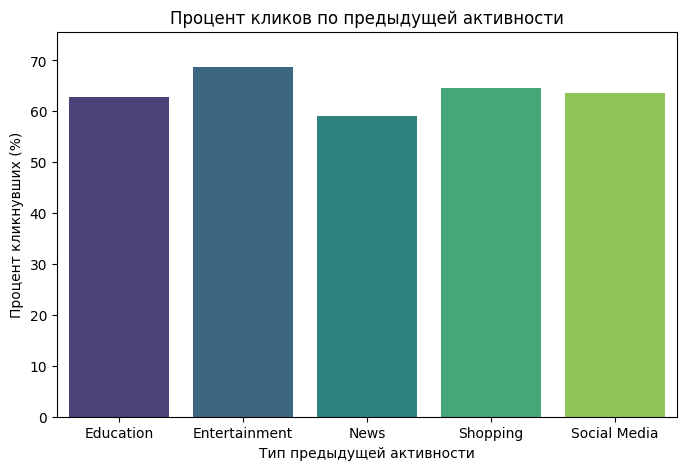

In [ ]:
# 5. Процент кликнувших по предыдущей активности
plot_click_percentage(df, 'browsing_history', "Процент кликов по предыдущей активности", "Тип предыдущей активности")

Из графика видно, что люди более предрасположены к клику по рекламе после просмотра лёгких источников информации, таких как развлекательный контент, либо при выбире покупок. И наоборот, если просматриваемый контент был достаточно сложным для восприятия, например, новости или обучающие материалы, вероятность клика снижается.

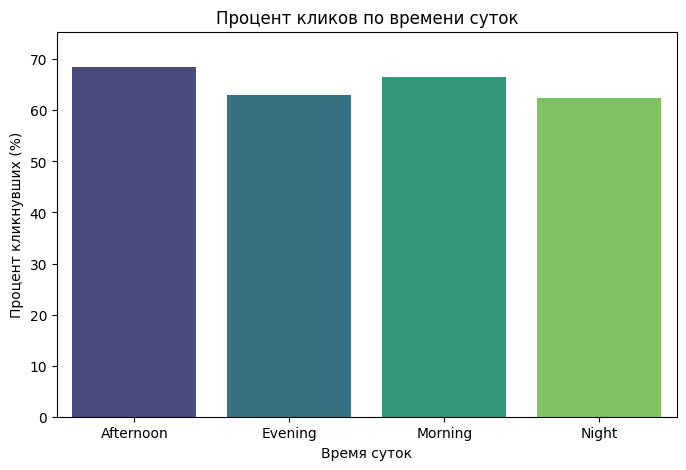

In [ ]:
# 6. Процент кликнувших по времени суток
plot_click_percentage(df, 'time_of_day', "Процент кликов по времени суток", "Время суток")

Утром и днем люди чаще кликают по рекламе, чем вечером и ночью

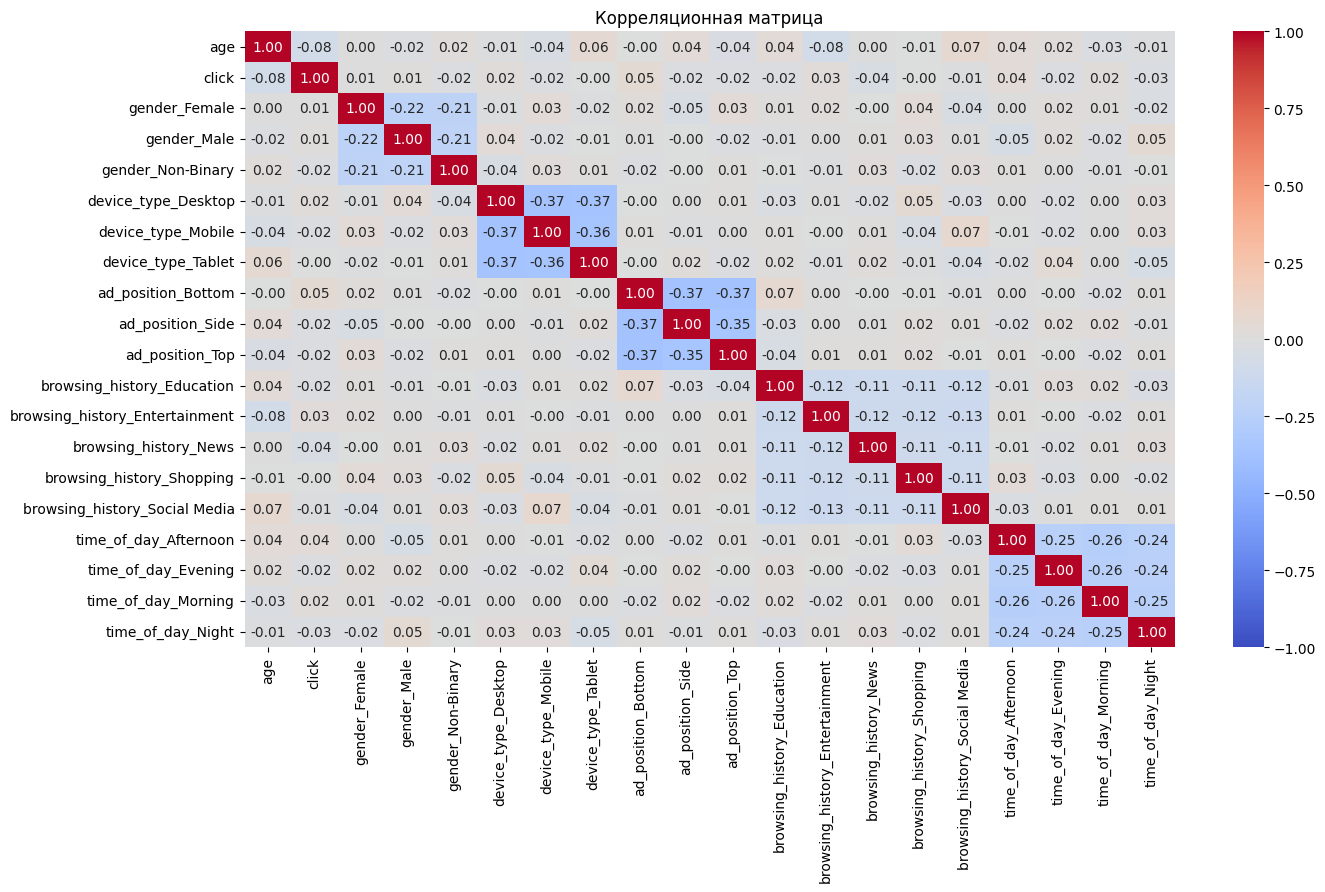

In [ ]:
data_encoded = pd.get_dummies(df, columns=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day'])

# Корреляционная матрица и тепловая карта
correlation_matrix = data_encoded.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

По матрице корреляции также видно, что клик по рекламе больше всего зависит от возраста, наилучшая позиция для рекламы - низ экрана, а наибольшее количество кликов происходит днем.

# Обработка пропущенных значений

In [ ]:
df.isnull().sum()

,0
age,4766
gender,4693
device_type,2000
ad_position,2000
browsing_history,4782
time_of_day,2000
click,0


Так как пропущенных значений достаточно много, простое удаление приведет к значительному ухудшению модели.

Вместо этого мы можем заменить их на моду, среднее или медиану.

Также, для вставки, мы можем использовать алгоритмы машинного обучения.


In [ ]:
from fancyimpute import KNN

# Заполнение пропусков для числовых столбцов
df['age'] = KNN(k=5, verbose=0).fit_transform(df[['age']])

# Заполнение пропущенных значений для категориальных переменных
for column in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
    mode_value = df[column].mode()[0]  # Находим моду
    df[column] = df[column].fillna(mode_value)  # Заполняем пропуски


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
device_type,0
ad_position,0
browsing_history,0
time_of_day,0
click,0


# Обработка категориальных признаков

In [ ]:
# Применение one-hot кодирования
df = pd.get_dummies(df, columns=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day'])

# Нормализация

In [ ]:
from sklearn.preprocessing import StandardScaler

# Нормализация числовых данных
scaler = StandardScaler()
data_encoded['age'] = scaler.fit_transform(data_encoded[['age']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             10000 non-null  float64
 1   click                           10000 non-null  int64  
 2   gender_Female                   10000 non-null  bool   
 3   gender_Male                     10000 non-null  bool   
 4   gender_Non-Binary               10000 non-null  bool   
 5   device_type_Desktop             10000 non-null  bool   
 6   device_type_Mobile              10000 non-null  bool   
 7   device_type_Tablet              10000 non-null  bool   
 8   ad_position_Bottom              10000 non-null  bool   
 9   ad_position_Side                10000 non-null  bool   
 10  ad_position_Top                 10000 non-null  bool   
 11  browsing_history_Education      10000 non-null  bool   
 12  browsing_history_Entertainment  1

# Обучающая и тестовая выборка

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop(['click'], axis=1)
y = df['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Запуск классификатора,подбор оптимального k, оценка модели, применение SMOTE для борьбы с несбалансированными классами

Метод ближайших соседей (KNN) хорошо подходит для задач классификации с небольшим количеством признаков и будет оптимален для данного задания. KNN учитывает расстояния между объектами, поэтому обработка и нормализация данных крайне важны. Также метод не может работать с пропущенными значениями, поэтому ранее мы от них избавились.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE

# Применяем SMOTE для балансировки классов на обучающей выборке
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 7. Подбор оптимального k
best_k = 1
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring='f1').mean()
    print(f'F1 Score for k={k}: {score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k after balancing: {best_k} with F1 score: {best_score}')

F1 Score for k=1: 0.73707521231737
F1 Score for k=2: 0.6979838897290417
F1 Score for k=3: 0.7533910975899634
F1 Score for k=4: 0.7283574138647296
F1 Score for k=5: 0.7498646517592384
F1 Score for k=6: 0.7317219779748233
F1 Score for k=7: 0.7413632237710844
F1 Score for k=8: 0.7381944127469948
F1 Score for k=9: 0.7374632248127926
F1 Score for k=10: 0.7219932372308427
F1 Score for k=11: 0.7258274939854015
F1 Score for k=12: 0.7183499877925101
F1 Score for k=13: 0.7202901254711216
F1 Score for k=14: 0.7124230004179012
F1 Score for k=15: 0.7127942464645046
F1 Score for k=16: 0.708801125728763
F1 Score for k=17: 0.7119035345324829
F1 Score for k=18: 0.7039898903237785
F1 Score for k=19: 0.7049539593901126
F1 Score for k=20: 0.7005332997581645
Best k after balancing: 3 with F1 score: 0.7533910975899634


Как видим, оптимальным значением k оказалось 3 с f1 score =  0.7533910975899634.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_balanced, y_train_balanced)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("KNN - Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("KNN - Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print(f"KNN Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"KNN Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

KNN - Training Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2795
           1       0.81      0.88      0.84      5205

    accuracy                           0.79      8000
   macro avg       0.77      0.75      0.76      8000
weighted avg       0.78      0.79      0.78      8000

KNN - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       705
           1       0.72      0.81      0.76      1295

    accuracy                           0.68      2000
   macro avg       0.64      0.62      0.62      2000
weighted avg       0.66      0.68      0.67      2000

KNN Train Accuracy: 0.78725
KNN Test Accuracy: 0.676


KNN Test Accuracy: 0.676 и KNN Train Accuracy: 0.78725 отличаются на 11 пунктов, что говорит о том, что модель имеет признаки переобучения.

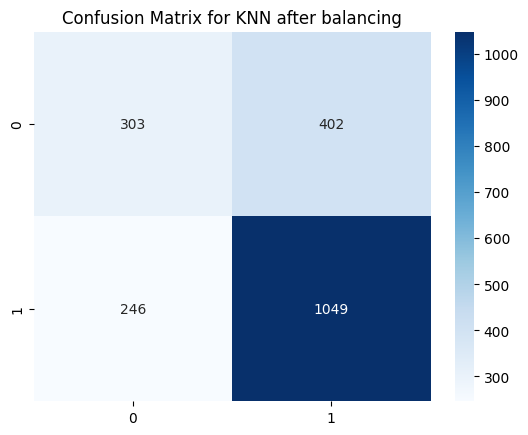

In [ ]:
# Визуализация матрицы ошибок для KNN
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN after balancing')
plt.show()

**Попробуем обучить Random forest на тех же данных**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Параметры для подбора гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Инициализация модели и настройка через GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Лучшая модель случайного леса
best_rf = grid_search.best_estimator_
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

# Оценка на тестовой выборке
y_test_rf_pred = best_rf.predict(X_test)

print("Random Forest - Testing Classification Report:")
print(classification_report(y_test, y_test_rf_pred))

# Оценка точности
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_test_rf_pred)}")

Best parameters for Random Forest: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'n_estimators': 100}
Random Forest - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54       705
           1       0.75      0.81      0.78      1295

    accuracy                           0.70      2000
   macro avg       0.67      0.65      0.66      2000
weighted avg       0.69      0.70      0.69      2000

Random Forest Test Accuracy: 0.699


Как видим, оценки немного подросли, но все равно далеки от идеала, возможно это связано с маленьким числом признаков в исходных данных.

# Общие выводы

* Наличие пропущенных значений может значительно повлиять на производительность
модели. Импутация или удаление таких значений критически важны для получения надежных результатов.

* Если данные не сбалансированы, это может привести к плохой производительности модели. Использование методов, таких как SMOTE, помогает улучшить качество классификации.

* Правильная обработка категориальных признаков, например, с помощью one-hot кодирования, играет важную роль в улучшении качества модели.

* Разные модели могут давать различные результаты в зависимости от структуры данных. В данном случае KNN и случайный лес продемонстрировали различные уровни точности и устойчивости.

* Наблюдаемые разницы между точностью на обучающей и тестовой выборках могут указывать на переобучение. Это говорит о необходимости подбора гиперпараметров и применения методов регуляризации.

* Важно проводить анализ ошибок предсказаний, чтобы лучше понять, где модель не справляется и какие данные можно использовать для дальнейшего улучшения.